###Spark Application 

-  Spark Application is a user program built on Spark.
-  Spark applications run as independent sets of processes on a cluster, coordinated by the SparkContext object in your main program (called the driver program). It is responsible for:
    -  maintaining information about spark application.
    -  responding to a user's program or input
    -  analyzing, distributing and scheduling the work across the executors (Comminicating with YARN/other Resource Negotiators)


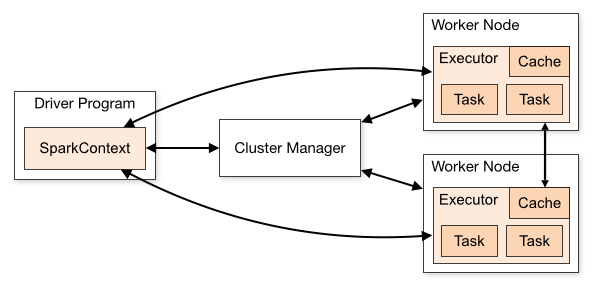

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz

In [ ]:
!tar xf spark-3.0.1-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
import os 
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content//spark-3.0.1-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql.types import *
from pyspark.sql.functions import * 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pyspark
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName('Spark RDD').getOrCreate()

In [ ]:
spark

In [ ]:
sc = spark.sparkContext

* Spark introduces the concept of an RDD (Resilient Distributed Dataset), an
 immutable fault-tolerant, distributed collection of objects that can be operated on
 in parallel. 

* An RDD can contain any type of object and is created by loading an
 external dataset or distributing a collection from the driver program.

In [ ]:
### Creating RDD in Pyspark

#####  There are three ways to create an RDD in Spark.

* Parallelizing already existing collection in driver program.
* Referencing a dataset in an external storage system (e.g. HDFS, Hbase, shared file system).
* Creating RDD from already existing RDDs.

In [ ]:
rdd1 = sc.parallelize([("maths",92),("english",75),("SCiences",85),("Social",90)])

In [ ]:
type(rdd1)

pyspark.rdd.RDD

In [ ]:
rdd1.collect() # Ram is of 16gb and my job is more than that

[('maths', 92), ('english', 75), ('SCiences', 85), ('Social', 90)]

#### Creating an rdd by reading a file 

In [ ]:
rdd2 = sc.textFile('/content/drive/MyDrive/temp_data.txt')

In [ ]:
rdd2

/content/drive/MyDrive/Datasets/temp_data.txt MapPartitionsRDD[2] at textFile at NativeMethodAccessorImpl.java:0

In [ ]:
rdd2.take(4)

['1901\t-78\t1', '1901\t-72\t1', '1901\t-94\t1', '1901\t-61\t1']

In [ ]:
rdd2.take(4)

['1901\t-78\t1', '1901\t-72\t1', '1901\t-94\t1', '1901\t-61\t1']

In [ ]:
rdd3 = rdd2.map(lambda s: s.split('\t'))

In [ ]:
type(rdd3)

pyspark.rdd.PipelinedRDD

In [ ]:
rdd3.take(4)

[['1901', '-78', '1'],
 ['1901', '-72', '1'],
 ['1901', '-94', '1'],
 ['1901', '-61', '1']]

In [ ]:
rdd2.take(4)

['1901\t-78\t1', '1901\t-72\t1', '1901\t-94\t1', '1901\t-61\t1']

### RDDs support two types of operations:
* Transformations are operations (such as map, filter, join, union, and so on) that are performed on an RDD and which yield a new RDD containing the result.

* Transformations in Spark are “lazy”, meaning that they do not compute their results right away. 
* They just “remember” the operation to be performed and the dataset (e.g., file) to which the operation is to be    performed. 
* The transformations are only actually computed when an action is called and the result is returned to the driver program. 
* This design enables Spark to run more efficiently. For example, if a big file was transformed in various ways and passed to first action, Spark would only process and return the result for the first line, rather than do the work for the entire file.

In [ ]:
intRdd = sc.parallelize([10,20,30,40,50])
mapRdd = intRdd.map(lambda x : x**2)

In [ ]:
intRdd.collect()


[10, 20, 30, 40, 50]

In [ ]:
mapRdd.collect()

[100, 400, 900, 1600, 2500]

In [ ]:
numRdd = sc.parallelize([9,10,11,12,13,14,15,16,17,18,19,20])
oddRdd = numRdd.filter(lambda num : num%2 == 1)
oddRdd.collect()

[9, 11, 13, 15, 17, 19]

In [ ]:
evenRdd = numRdd.filter(lambda num : num%2 == 0)
evenRdd.collect()

[10, 12, 14, 16, 18, 20]

In [ ]:
x = sc.parallelize([('comp',5),('tab',1),('comp',1),('comp',1),('comp',1),
                     ('tab',1),('tab',1),('tab',1),('tab',1),('tab',1),('tab',1)])

In [ ]:
x.collect()

[('comp', 5),
 ('tab', 1),
 ('comp', 1),
 ('comp', 1),
 ('comp', 1),
 ('tab', 1),
 ('tab', 1),
 ('tab', 1),
 ('tab', 1),
 ('tab', 1),
 ('tab', 1)]

In [ ]:
y = x.reduceByKey(lambda a,b:a+b)
y.collect()

[('comp', 8), ('tab', 7)]

In [ ]:
mapRddint = sc.parallelize([3,4,5]).map(lambda x : range(1,x)).collect()

In [ ]:
mapRddint

[range(1, 3), range(1, 4), range(1, 5)]

In [ ]:
flatMapRddInt = sc.parallelize([3,4,5]).flatMap(lambda x : range(1,x)).collect()

In [ ]:
flatMapRddInt

[1, 2, 1, 2, 3, 1, 2, 3, 4]

In [ ]:
sentence = ['Welecome to Big Data.','The batch 108 107','Module is Big Data','Rdd are constructed']
sentRdd = sc.parallelize(sentence)

In [ ]:

sentRdd

ParallelCollectionRDD[22] at readRDDFromFile at PythonRDD.scala:262

In [ ]:
sentRdd.map(lambda sent : sent.split(' ')).collect()

[['Welecome', 'to', 'Big', 'Data.'],
 ['The', 'batch', '108', '107'],
 ['Module', 'is', 'Big', 'Data'],
 ['Rdd', 'are', 'constructed']]

In [ ]:
wordsRdd = sentRdd.flatMap(lambda sent : sent.split(' '))
wordsRdd.collect()

['Welecome',
 'to',
 'Big',
 'Data.',
 'The',
 'batch',
 '108',
 '107',
 'Module',
 'is',
 'Big',
 'Data',
 'Rdd',
 'are',
 'constructed']

In [ ]:
profRdd = sc.parallelize([('proff1',1),('proff2',1),('proff1',1),('proff1',1),('proff2',1),('proff3',1)])

In [ ]:
profRdd.groupByKey().collect()

[('proff1', <pyspark.resultiterable.ResultIterable at 0x7fc5aacb3d10>),
 ('proff3', <pyspark.resultiterable.ResultIterable at 0x7fc5aacb3f10>),
 ('proff2', <pyspark.resultiterable.ResultIterable at 0x7fc5a4838950>)]

In [ ]:
profRdd.groupByKey().map(lambda x : (x[0],list(x[1]))).collect()

[('proff1', [1, 1, 1]), ('proff3', [1]), ('proff2', [1, 1])]

In [ ]:
proffRdd1 = sc.parallelize(['proff1','proff2','proff1'
,'proff1','proff2','proff3','proff1','proff2','proff3','student1','student2','student3'])

In [ ]:
result = proffRdd1.groupBy(lambda word : word[0]).collect()

In [ ]:
result

[('s', <pyspark.resultiterable.ResultIterable at 0x7fde59851b50>),
 ('p', <pyspark.resultiterable.ResultIterable at 0x7fde59851410>)]

In [ ]:
[(x,list(y)) for (x,y) in result]

[('p',
  ['proff1',
   'proff2',
   'proff1',
   'proff1',
   'proff2',
   'proff3',
   'proff1',
   'proff2',
   'proff3']),
 ('s', ['student1', 'student2', 'student3'])]

In [ ]:
deviceRdd = sc.parallelize(['tab','computer','mobile','router','mouseclick'])
pairRdd = deviceRdd.map(lambda x : (len(x),x))

In [ ]:
pairRdd.collect()

[(3, 'tab'), (8, 'computer'), (6, 'mobile'), (6, 'router'), (10, 'mouseclick')]

In [ ]:
result = pairRdd.mapValues(lambda y :  "Device Name is " + y )

In [ ]:
result.collect()

[(3, 'Device Name is tab'),
 (8, 'Device Name is computer'),
 (6, 'Device Name is mobile'),
 (6, 'Device Name is router'),
 (10, 'Device Name is mouseclick')]

In [ ]:
rdd1 = sc.parallelize([("Mercedes","E-Class"),("Toyota","Corolla"),("Renault","Duster")])
rdd2 = sc.parallelize([("Mercedes","S-Class"),("Toyota","Fortuner"),("Suzuki","Mayona")])
innerJoinRdd = rdd1.join(rdd2)

In [ ]:
innerJoinRdd.collect()

[('Toyota', ('Corolla', 'Fortuner')), ('Mercedes', ('E-Class', 'S-Class'))]

In [ ]:
leftOuterJoinRdd = rdd1.leftOuterJoin(rdd2)
leftOuterJoinRdd.collect()

[('Toyota', ('Corolla', 'Fortuner')),
 ('Mercedes', ('E-Class', 'S-Class')),
 ('Renault', ('Duster', None))]

In [ ]:
unionRdd = rdd1.union(rdd2)
unionRdd.collect()

[('Mercedes', 'E-Class'),
 ('Toyota', 'Corolla'),
 ('Renault', 'Duster'),
 ('Mercedes', 'S-Class'),
 ('Toyota', 'Fortuner'),
 ('Suzuki', 'Mayona')]

In [ ]:
unionRdd.first()

('Mercedes', 'E-Class')

In [ ]:
unionRdd.take(2)

[('Mercedes', 'E-Class'), ('Toyota', 'Corolla')]

In [ ]:
unionRdd.takeOrdered(4)

[('Mercedes', 'E-Class'),
 ('Mercedes', 'S-Class'),
 ('Renault', 'Duster'),
 ('Suzuki', 'Mayona')]

### Word Count Example

### Using the above operations write a spark program that can read the 'input.txt' file. Find the frequency of each word in the document